In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

 ········


In [2]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query = '''SELECT f.title, c.name AS category, rental_duration, rental_rate, length, rating
FROM film f
JOIN inventory i
USING (film_id)
JOIN rental r
USING (inventory_id)
JOIN film_category fc
USING (film_id)
JOIN category c
USING (category_id);'''

data = pd.read_sql_query(query, engine)
data.head(50)

data.isna().value_counts()

title  category  rental_duration  rental_rate  length  rating
False  False     False            False        False   False     16044
dtype: int64

In [3]:
import statistics as stats

grouped_data = data.groupby('title').agg({
    'rental_duration': 'mean',
    'rental_rate': 'mean',
    'length': 'mean',
    'category': lambda x: stats.mode(x)[0][0],
    'rating': lambda x: stats.mode(x)[0][0]
}).reset_index()

print(grouped_data)

                 title  rental_duration  rental_rate  length category rating
0     ACADEMY DINOSAUR              6.0         0.99    86.0        D      P
1       ACE GOLDFINGER              3.0         4.99    48.0        H      G
2     ADAPTATION HOLES              7.0         2.99    50.0        D      N
3     AFFAIR PREJUDICE              5.0         2.99   117.0        H      G
4          AFRICAN EGG              6.0         2.99   130.0        F      G
..                 ...              ...          ...     ...      ...    ...
953     YOUNG LANGUAGE              6.0         0.99   183.0        D      G
954         YOUTH KICK              4.0         0.99   179.0        M      N
955       ZHIVAGO CORE              6.0         0.99   105.0        H      N
956  ZOOLANDER FICTION              5.0         2.99   101.0        C      R
957          ZORRO ARK              3.0         4.99    50.0        C      N

[958 rows x 6 columns]


In [4]:
query = '''SELECT f.title, c.name AS category, rental_duration, rental_rate, length, rating
FROM film f
JOIN film_category fc
USING (film_id)
JOIN category c
USING (category_id)
WHERE film_id IN (
    SELECT f.film_id
    FROM film f
    LEFT JOIN inventory i
    ON f.film_id = i.film_id
    WHERE i.film_id IS NULL
);;'''

md = pd.read_sql_query(query, engine)
md.head(50)

,title,category,rental_duration,rental_rate,length,rating
0,ARK RIDGEMONT,Action,6,0.99,68,NC-17
1,FIREHOUSE VIETNAM,Action,7,0.99,103,G
2,SKY MIRACLE,Action,7,2.99,132,PG
3,ARGONAUTS TOWN,Animation,7,0.99,127,PG-13
4,FLOATS GARDEN,Animation,6,2.99,145,PG-13
5,SISTER FREDDY,Children,5,4.99,152,PG-13
6,WALLS ARTIST,Children,7,4.99,135,PG
7,ALICE FANTASIA,Classics,6,0.99,94,NC-17
8,TADPOLE PARK,Classics,6,2.99,155,PG
9,VOLUME HOUSE,Classics,7,4.99,132,PG


In [5]:
data = pd.concat([grouped_data, md], axis=0)

In [6]:
data.isna().value_counts()

title  rental_duration  rental_rate  length  category  rating
False  False            False        False   False     False     1000
dtype: int64

In [7]:
data.sort_values(by='title')

,title,rental_duration,rental_rate,length,category,rating
0,ACADEMY DINOSAUR,6.0,0.99,86.0,D,P
1,ACE GOLDFINGER,3.0,4.99,48.0,H,G
2,ADAPTATION HOLES,7.0,2.99,50.0,D,N
3,AFFAIR PREJUDICE,5.0,2.99,117.0,H,G
4,AFRICAN EGG,6.0,2.99,130.0,F,G
...,...,...,...,...,...,...
953,YOUNG LANGUAGE,6.0,0.99,183.0,D,G
954,YOUTH KICK,4.0,0.99,179.0,M,N
955,ZHIVAGO CORE,6.0,0.99,105.0,H,N
956,ZOOLANDER FICTION,5.0,2.99,101.0,C,R


In [8]:
query = '''SELECT title,
       CASE
           WHEN MONTH(r.rental_date) = 5 AND YEAR(r.rental_date) = 2005 THEN 1
           ELSE 0 END AS rented_in_May
FROM film f
JOIN inventory
USING (film_id)
JOIN rental r
USING (inventory_id);'''

data_target = pd.read_sql_query(query, engine)
data_target = data_target.groupby(['title']).agg({'rented_in_May':sum})

missing_films_query = ''' SELECT title 
FROM film 
WHERE film_id IN (
    SELECT f.film_id
    FROM film f
    LEFT JOIN inventory i
    ON f.film_id = i.film_id
    WHERE i.film_id IS NULL
);'''

missing_films = pd.read_sql_query(missing_films_query, engine)
missing_films['rented_in_May'] = 0
missing_films

,title,rented_in_May
0,ALICE FANTASIA,0
1,APOLLO TEEN,0
2,ARGONAUTS TOWN,0
3,ARK RIDGEMONT,0
4,ARSENIC INDEPENDENCE,0
5,BOONDOCK BALLROOM,0
6,BUTCH PANTHER,0
7,CATCH AMISTAD,0
8,CHINATOWN GLADIATOR,0
9,CHOCOLATE DUCK,0


In [9]:
data_target.reset_index(inplace = True)
missing_films.reset_index(inplace = True)

In [10]:
dt = pd.concat([data_target, missing_films], axis=0)

In [11]:
dt.drop(['index'], axis = 1)

,title,rented_in_May
0,ACADEMY DINOSAUR,2
1,ACE GOLDFINGER,0
2,ADAPTATION HOLES,1
3,AFFAIR PREJUDICE,2
4,AFRICAN EGG,1
...,...,...
37,TREASURE COMMAND,0
38,VILLAIN DESPERATE,0
39,VOLUME HOUSE,0
40,WAKE JAWS,0


In [12]:
dt = dt.sort_values(by='title')

In [13]:
dt.drop(['index'], axis = 1)

,title,rented_in_May
0,ACADEMY DINOSAUR,2
1,ACE GOLDFINGER,0
2,ADAPTATION HOLES,1
3,AFFAIR PREJUDICE,2
4,AFRICAN EGG,1
...,...,...
953,YOUNG LANGUAGE,0
954,YOUTH KICK,0
955,ZHIVAGO CORE,1
956,ZOOLANDER FICTION,1


In [14]:
def from_count_to_boolean(x):
    if x > 0:
        return True
    else:
        return False

dt['rented_in_May'] = dt['rented_in_May'].apply(from_count_to_boolean)



In [15]:
dt.drop(['index'], axis = 1)

,title,rented_in_May
0,ACADEMY DINOSAUR,True
1,ACE GOLDFINGER,False
2,ADAPTATION HOLES,True
3,AFFAIR PREJUDICE,True
4,AFRICAN EGG,True
...,...,...
953,YOUNG LANGUAGE,False
954,YOUTH KICK,False
955,ZHIVAGO CORE,True
956,ZOOLANDER FICTION,True


In [16]:
print(dt.isna().value_counts())

title  rented_in_May  index
False  False          True     958
                      False     42
dtype: int64


In [17]:
data.head()

,title,rental_duration,rental_rate,length,category,rating
0,ACADEMY DINOSAUR,6.0,0.99,86.0,D,P
1,ACE GOLDFINGER,3.0,4.99,48.0,H,G
2,ADAPTATION HOLES,7.0,2.99,50.0,D,N
3,AFFAIR PREJUDICE,5.0,2.99,117.0,H,G
4,AFRICAN EGG,6.0,2.99,130.0,F,G


In [18]:
dt = dt.drop(columns=['index'])
dt.head()

,title,rented_in_May
0,ACADEMY DINOSAUR,True
1,ACE GOLDFINGER,False
2,ADAPTATION HOLES,True
3,AFFAIR PREJUDICE,True
4,AFRICAN EGG,True


In [19]:
numerical = data.select_dtypes(include=['number'])
categorical = data.select_dtypes(include=['object'])

In [20]:
numerical.head()

,rental_duration,rental_rate,length
0,6.0,0.99,86.0
1,3.0,4.99,48.0
2,7.0,2.99,50.0
3,5.0,2.99,117.0
4,6.0,2.99,130.0


In [21]:
categorical.head()

,title,category,rating
0,ACADEMY DINOSAUR,D,P
1,ACE GOLDFINGER,H,G
2,ADAPTATION HOLES,D,N
3,AFFAIR PREJUDICE,H,G
4,AFRICAN EGG,F,G


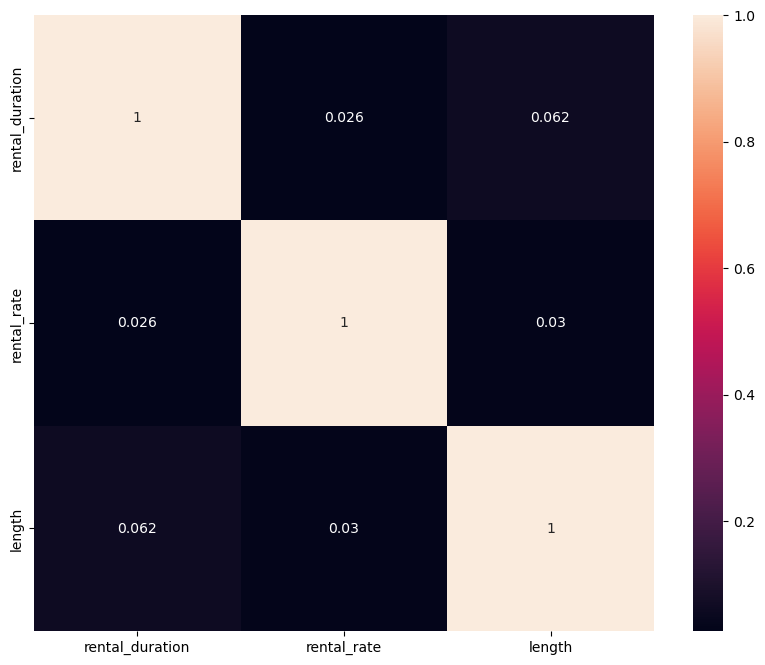

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix= numerical.corr()  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

# Features seem not to be strongly correlated each other

In [23]:
y = dt['rented_in_May']
X = data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [24]:
print(X_train, X_test, y_train, y_test)

                    title  rental_duration  rental_rate  length category  \
46   BALLROOM MOCKINGBIRD              6.0         0.99   173.0        F   
789        SPEAKEASY DATE              6.0         2.99   165.0        A   
722      SADDLE ANTITRUST              7.0         2.99    80.0        C   
283         FALCON VOLUME              5.0         4.99   102.0        A   
39      ATTRACTION NEWTON              5.0         4.99    83.0        N   
..                    ...              ...          ...     ...      ...   
167        CONQUERER NUTS              4.0         4.99   173.0        D   
232       DRACULA CRYSTAL              7.0         0.99   176.0        C   
860       TOURIST PELICAN              4.0         4.99   152.0        S   
189     DALMATIONS SWEDEN              4.0         0.99   106.0        D   
151       CLUELESS BUCKET              4.0         2.99    95.0        A   

    rating  
46       G  
789      P  
722      P  
283      P  
39       P  
..     ..

In [25]:
y

0       True
1      False
2       True
3       True
4       True
       ...  
953    False
954    False
955     True
956     True
957     True
Name: rented_in_May, Length: 1000, dtype: bool

In [26]:
X

,title,rental_duration,rental_rate,length,category,rating
0,ACADEMY DINOSAUR,6.0,0.99,86.0,D,P
1,ACE GOLDFINGER,3.0,4.99,48.0,H,G
2,ADAPTATION HOLES,7.0,2.99,50.0,D,N
3,AFFAIR PREJUDICE,5.0,2.99,117.0,H,G
4,AFRICAN EGG,6.0,2.99,130.0,F,G
...,...,...,...,...,...,...
37,PERDITION FARGO,7.0,4.99,99.0,Sports,NC-17
38,ARSENIC INDEPENDENCE,4.0,0.99,137.0,Travel,PG
39,BOONDOCK BALLROOM,7.0,0.99,76.0,Travel,NC-17
40,GUMP DATE,3.0,4.99,53.0,Travel,NC-17


In [34]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

X_num = data.select_dtypes(include = np.number)
X_cat = data.select_dtypes(include = object)

X_train_num = X_train.select_dtypes(include = np.number)

# Scaling data
transformer = MinMaxScaler().fit(X_num) # need to keep transformer
X_train_normalized = transformer.transform(X_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_num.columns)
X_train_norm

,rental_duration,rental_rate,length
0,0.75,2.775558e-17,0.287770
1,0.00,1.000000e+00,0.014388
2,1.00,5.000000e-01,0.028777
3,0.50,5.000000e-01,0.510791
4,0.75,5.000000e-01,0.604317
...,...,...,...
995,1.00,1.000000e+00,0.381295
996,0.25,2.775558e-17,0.654676
997,1.00,2.775558e-17,0.215827
998,0.00,1.000000e+00,0.050360


In [35]:
X_cat

,title,category,rating
0,ACADEMY DINOSAUR,D,P
1,ACE GOLDFINGER,H,G
2,ADAPTATION HOLES,D,N
3,AFFAIR PREJUDICE,H,G
4,AFRICAN EGG,F,G
...,...,...,...
37,PERDITION FARGO,Sports,NC-17
38,ARSENIC INDEPENDENCE,Travel,PG
39,BOONDOCK BALLROOM,Travel,NC-17
40,GUMP DATE,Travel,NC-17


In [36]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(X_cat)

cols = encoder.get_feature_names_out(input_features=X_cat.columns)
categorical_encode = pd.DataFrame(encoder.transform(X_cat).toarray(), columns=cols)
categorical_encode

,title_ACE GOLDFINGER,title_ADAPTATION HOLES,title_AFFAIR PREJUDICE,title_AFRICAN EGG,title_AGENT TRUMAN,title_AIRPLANE SIERRA,title_AIRPORT POLLOCK,title_ALABAMA DEVIL,title_ALADDIN CALENDAR,title_ALAMO VIDEOTAPE,...,category_Sci-Fi,category_Sports,category_T,category_Travel,rating_N,rating_NC-17,rating_P,rating_PG,rating_PG-13,rating_R
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [37]:
X_train_transformed = pd.concat([X_train_norm, categorical_encode], axis=1)

In [38]:
X_train_transformed

,rental_duration,rental_rate,length,title_ACE GOLDFINGER,title_ADAPTATION HOLES,title_AFFAIR PREJUDICE,title_AFRICAN EGG,title_AGENT TRUMAN,title_AIRPLANE SIERRA,title_AIRPORT POLLOCK,...,category_Sci-Fi,category_Sports,category_T,category_Travel,rating_N,rating_NC-17,rating_P,rating_PG,rating_PG-13,rating_R
0,0.75,2.775558e-17,0.287770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.00,1.000000e+00,0.014388,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.00,5.000000e-01,0.028777,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.50,5.000000e-01,0.510791,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.75,5.000000e-01,0.604317,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.00,1.000000e+00,0.381295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
996,0.25,2.775558e-17,0.654676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
997,1.00,2.775558e-17,0.215827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
998,0.00,1.000000e+00,0.050360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [32]:


# columns_to_fill = ["rental_duration", "rental_rate", "length"]
# column_averages = X_train_transformed[columns_to_fill].mean()
# X_train_transformed[columns_to_fill] = X_train_transformed[columns_to_fill].fillna(column_averages)

# X_train_transformed.info()

In [39]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_transformed, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [1000, 800]